# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./data/train.p"
validation_file= "./data/valid.p"
testing_file =  "./data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

First we check the number of training and testing examples, the width and height of each image and the number of classes of signs:

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Here first I list one random traffic sign for each class. Then I list the description of each class

In [3]:
import matplotlib.pyplot as plt
import random

label_df = pd.read_csv("signnames.csv")
id2label = {}
for i in range(0,len(label_df)):
    id2label[label_df.loc[i][0]] = label_df.loc[i][1]

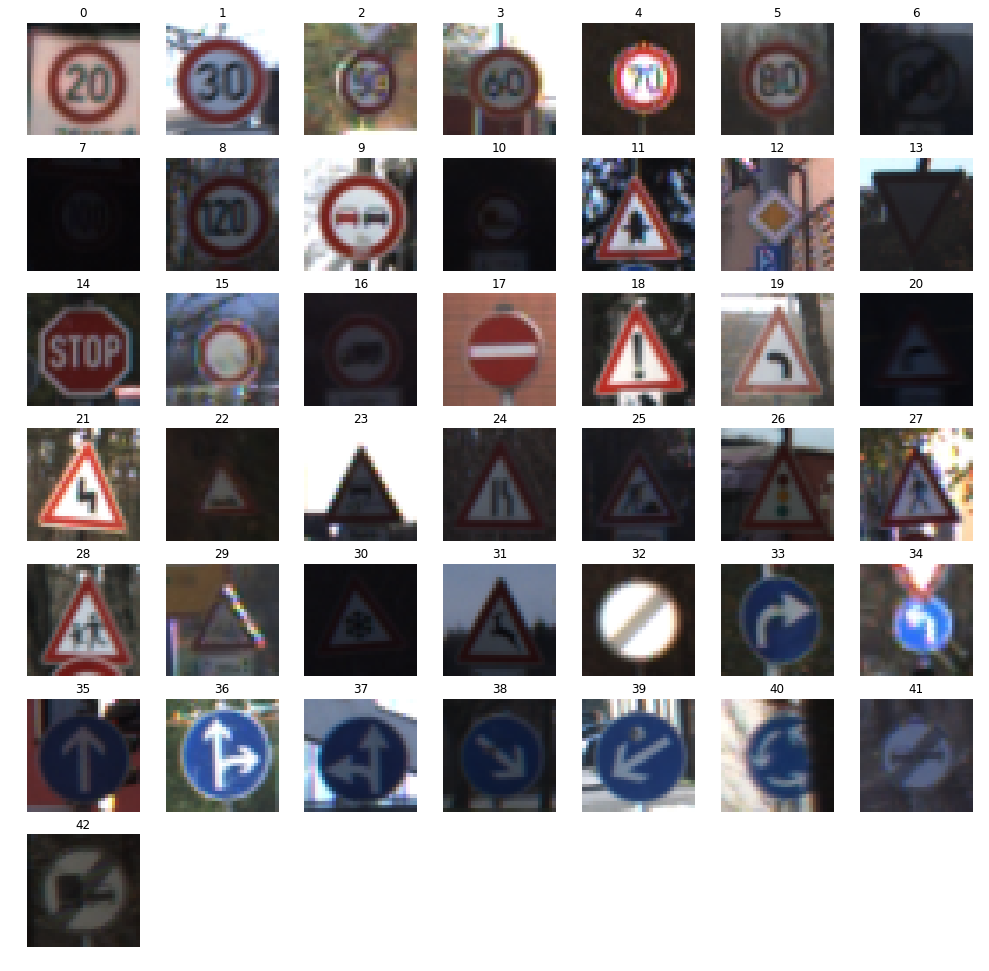

List of signs:
id 0: Speed limit (20km/h)
id 1: Speed limit (30km/h)
id 2: Speed limit (50km/h)
id 3: Speed limit (60km/h)
id 4: Speed limit (70km/h)
id 5: Speed limit (80km/h)
id 6: End of speed limit (80km/h)
id 7: Speed limit (100km/h)
id 8: Speed limit (120km/h)
id 9: No passing
id 10: No passing for vehicles over 3.5 metric tons
id 11: Right-of-way at the next intersection
id 12: Priority road
id 13: Yield
id 14: Stop
id 15: No vehicles
id 16: Vehicles over 3.5 metric tons prohibited
id 17: No entry
id 18: General caution
id 19: Dangerous curve to the left
id 20: Dangerous curve to the right
id 21: Double curve
id 22: Bumpy road
id 23: Slippery road
id 24: Road narrows on the right
id 25: Road work
id 26: Traffic signals
id 27: Pedestrians
id 28: Children crossing
id 29: Bicycles crossing
id 30: Beware of ice/snow
id 31: Wild animals crossing
id 32: End of all speed and passing limits
id 33: Turn right ahead
id 34: Turn left ahead
id 35: Ahead only
id 36: Go straight or right
id 3

In [4]:
%matplotlib inline

# randomly plot one image for each traffic sign
fig, axes = plt.subplots(7,7, figsize=(17, 17))
ax_arr = axes.ravel()
for i in range(49):
    if i < n_classes:
        ind = random.randint(0, len(X_train))
        while (y_train[ind] != i):
            ind = random.randint(0, len(X_train))

        img = X_train[ind]

        ax_arr[i].axis('off')
        ax_arr[i].imshow(img)
        ax_arr[i].set_title(y_train[ind])
    else:
        ax_arr[i].axis('off')
plt.show()

print("List of signs:")
for id in id2label:
    print("id %s: %s" % (id, id2label[id]))

Here we will see the distribution of traffic sign classes. As can be seen, the ration among these classes are not balanced. For example class 0 and class 1 or 2.

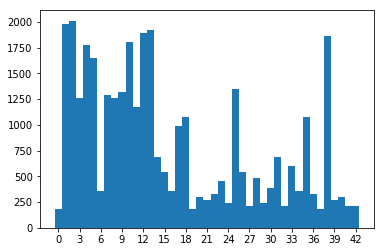

In [5]:
# plot the histogram of distribution of classes
plt.hist(y_train, bins=n_classes, align = 'mid' , range=(-0.5, n_classes-0.5))
plt.xticks(range(0,n_classes,3))
plt.show()

----

## Step 2: Design and Test a Model Architecture

### Pre-process the Data Set (normalization, grayscale, etc.)

We first convert each image to grayscale and normalizing pixel intensities. 

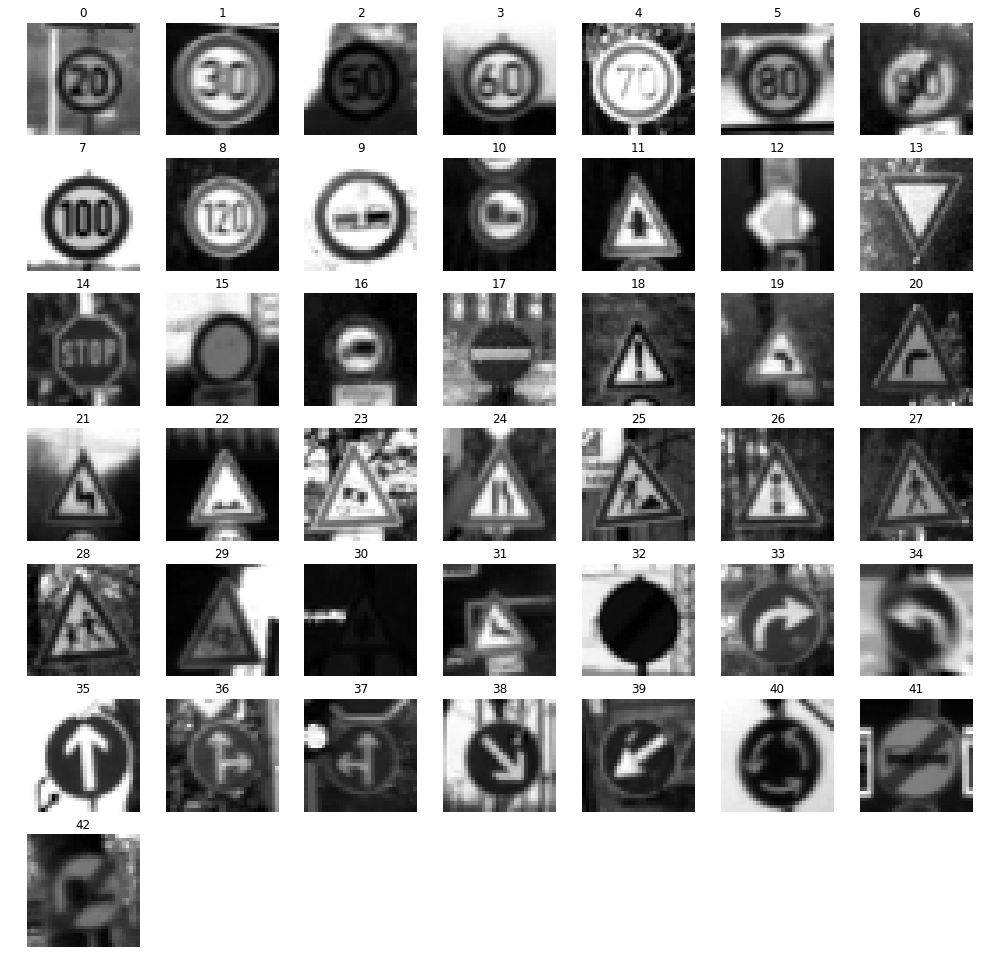

In [6]:
def normalize(images):
    return (images-128)/128

def gray_scale(images):
    return np.sum(images/3, axis=3, keepdims=True)
    
# Convert all the images to grayscale
X_train_gray = normalize(gray_scale(X_train))
X_test_gray = normalize(gray_scale(X_test))
X_valid_gray = normalize(gray_scale(X_valid))

# For each class display one random image after gray scale
fig, axes = plt.subplots(7,7, figsize=(17, 17))
ax_arr = axes.ravel()
for i in range(49):
    if i < n_classes:
        ind = random.randint(0, len(X_train_gray))
        while (y_train[ind] != i):
            ind = random.randint(0, len(X_train_gray)-1)

        img = X_train_gray[ind]

        ax_arr[i].axis('off')
        ax_arr[i].imshow(img.reshape(32,32), cmap = 'gray')
        ax_arr[i].set_title(y_train[ind])
    else:
        ax_arr[i].axis('off')

Augmenting the training images has been known to improve the performance of deep neural networks. Here, I am using [Augmentor](https://github.com/mdbloice/Augmentor) to distort images in the train set. The main advantage of Augmentor is it provide size-preserving operations and don't leave the black or white background when we rotate or translate the images.

To use Augmentor, we first need to define a pipeline which consists multimiple augmenting operations. Each augmenting operation is assigned with a probability. Each image when passing the pipeline is passed each operation in the order and executed with the given probability assigned for each augmenting operation. I utilize four operations with probablity 0.5 for each: 

+ rotate to the right with a random angle from 0 to 25 degree
+ rotate to the left with a random angle from 0 to 25 degree
+ zoom with random factor from 1 to 1.4
+ skew and tilt with magnitute 0.4

In [7]:
from Augmentor import Pipeline

aug_X_train = []
aug_y_train = []

#augmentation = image_augmentation()

num_aug = 0

p = Pipeline()
# randomly rotate to the right at most 25 degree
p.rotate(probability=0.5, max_left_rotation=0, max_right_rotation=25)
# randomly rotate to the left at most 25 degree
p.rotate(probability=0.5, max_left_rotation=25, max_right_rotation=0)
# randomly zoom to at most 25 percent 
p.zoom(probability=0.5, min_factor=1.0, max_factor=1.4)
# randomly skew and tilt
p.skew_tilt(probability=0.5, magnitude=0.4)

Now we apply the pipeline on the training dataset and create 50% more data

In [8]:
# using pipeline to create 50% more data on the training set
while (num_aug < len(X_train)*0.5):
    i = random.randint(0, len(X_train)-1)
    img = p.sample_with_array(X_train[i])
    aug_X_train.append(np.array(img))
    aug_y_train.append(y_train[i])
    num_aug += 1

# concatenate newly augmented data with the training data    
X_train_all = np.concatenate((X_train, np.array(aug_X_train).reshape(len(aug_X_train),32,32,3)), axis=0)
y_train_all = np.concatenate((y_train, aug_y_train), axis=0)
X_train_all = normalize(gray_scale(X_train_all))

Now we sketch randomly one image for each class from the original training set and the newly augmented images:  

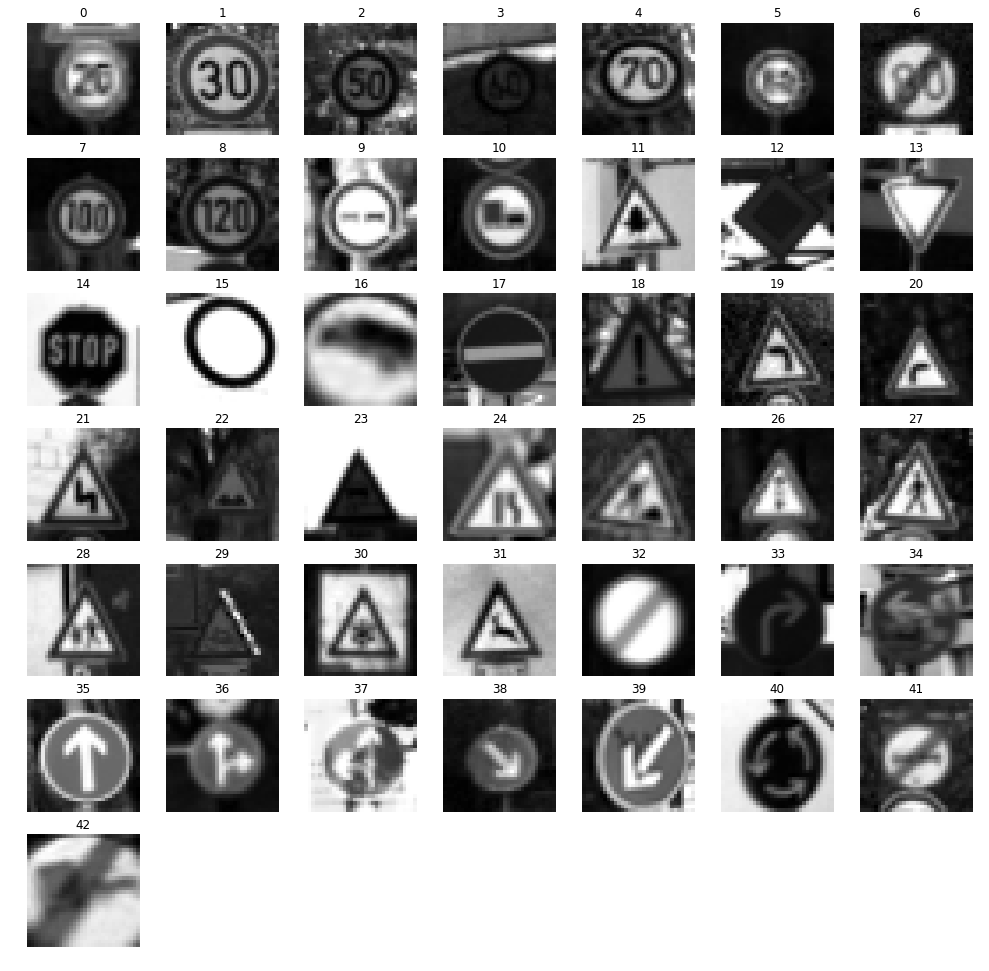

In [9]:
fig, axes = plt.subplots(7,7, figsize=(17, 17))
ax_arr = axes.ravel()
for i in range(49):
    if i < n_classes:
        ind = random.randint(0, len(X_train_all))
        while (y_train_all[ind] != i):
            ind = random.randint(0, len(X_train_all)-1)

        img = X_train_all[ind]

        ax_arr[i].axis('off')
        ax_arr[i].imshow(img.reshape(32,32), cmap='gray')
        ax_arr[i].set_title(y_train_all[ind])
    else:
        ax_arr[i].axis('off')

### Model Architecture

Here I utilize Keras to build my CNN architecture. I have try to model according to VGG architecture with stacked 3x3 convolutional layers with increasing depth. 
So my architecture consists of 6 convolutional layers with increasing depth. There are three pairs of stacked convolutional layers of kernel 3x3. According to VGGNet, they utilized kernel size 3x3 back to back to replace a kernel size 7x7 or 11x11 and increase the depth of the networks learn more complex data structure. Here I have tried using kernel size 5x5 back to back as well. The training time is increasing however my validation and test accuracy are decreased. Since we have small image size, the kernel size 3x3 is sufficient. 

I also utilize a max poolingafter each pair of convolutional layers. A dropout layer is followed to model an adverserial enviroment to make the networks trainning better. The dropout probability is set to 0.2 or 0.3 in earlier convolutional layers and 0.4 in the last convolutional layers. I tried to set the dropout probability of earlier layers to 0.4 or 0.5 as well, however, the network is training slow and the accuracy is decreasing significantly. It could be the case that our image is small, a high drop out rate results in losing many important features.

Followed the convolutional layers is 2 dense layers, one is of size 256 and one is equal to the number of classes. Decreasing the size of the first dense layer  results in decreasing the performance while increasing the size of the first dense layer does not seems to improve the accuracy.

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D


y_train_all_one_hot = LabelBinarizer().fit_transform(y_train_all)
y_valid_one_hot = LabelBinarizer().fit_transform(y_valid)
y_test_one_hot = LabelBinarizer().fit_transform(y_test)


with tf.device('/gpu:0'):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='valid', input_shape=(32, 32, 1), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='valid', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (2, 2), padding='valid', activation='relu'))
    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(n_classes, activation='softmax'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

### Train, Validate and Test the Model

Here I choose to train with 20 training epochs and batch size is 256. I haven't played with the batch size that much except for increasing it to 512 or decrease it to 128. I didn't notice much difference in performance given other paramters fixed. For the number of training epochs, reducing it to 10 or 5 did not yield the high accuracy on validation test as 20. If I increased the number of training epochs to 40 or 50, I noticed my validation performance flunctating and decreased a bit compared to less number of epochs so 20 seems a sufficient number.  

After that, we evaluate our model on the testing dataset.

In [11]:
print("\n\n*************** TRAINING PROCESS ***************\n")
    
model.compile('adam', 'categorical_crossentropy', ['accuracy'])
history = model.fit(X_train_all, y_train_all_one_hot, batch_size=256, epochs=20, 
                    validation_data=(X_valid_gray, y_valid_one_hot), verbose=2)


print("\n\n*************** TESTING PROCESS ***************\n")

metrics = model.evaluate(X_test_gray, y_test_one_hot, verbose=2)

for i in range(len(model.metrics_names)):
    print('{}: {}'.format(model.metrics_names[i], metrics[i]))



*************** TRAINING PROCESS ***************

Train on 52199 samples, validate on 4410 samples
Epoch 1/20
 - 32s - loss: 2.7107 - acc: 0.2575 - val_loss: 0.9318 - val_acc: 0.7576
Epoch 2/20
 - 28s - loss: 0.9026 - acc: 0.7449 - val_loss: 0.2502 - val_acc: 0.9254
Epoch 3/20
 - 28s - loss: 0.5045 - acc: 0.8522 - val_loss: 0.1312 - val_acc: 0.9649
Epoch 4/20
 - 28s - loss: 0.3772 - acc: 0.8893 - val_loss: 0.1165 - val_acc: 0.9710
Epoch 5/20
 - 28s - loss: 0.2953 - acc: 0.9134 - val_loss: 0.0871 - val_acc: 0.9762
Epoch 6/20
 - 28s - loss: 0.2447 - acc: 0.9286 - val_loss: 0.1141 - val_acc: 0.9669
Epoch 7/20
 - 28s - loss: 0.2169 - acc: 0.9366 - val_loss: 0.0637 - val_acc: 0.9821
Epoch 8/20
 - 28s - loss: 0.1888 - acc: 0.9445 - val_loss: 0.0747 - val_acc: 0.9805
Epoch 9/20
 - 28s - loss: 0.1705 - acc: 0.9489 - val_loss: 0.0566 - val_acc: 0.9848
Epoch 10/20
 - 28s - loss: 0.1466 - acc: 0.9570 - val_loss: 0.0508 - val_acc: 0.9871
Epoch 11/20
 - 28s - loss: 0.1418 - acc: 0.9582 - val_loss

97.57% accuracy :)= The performance is generalized well on the testing dataset. 

---

## Step 3: Test a Model on New Images

I downloaded 5 images from the internet and croped out other parts of the images and resize them to 32x32 ones. The resized images are put in new-signs folder with suffix "mod". The original images are also in new-signs folder with suffix "orginal". 

### Load and Output the Images

Here I first load the images and assign the ground truth class for each image: 

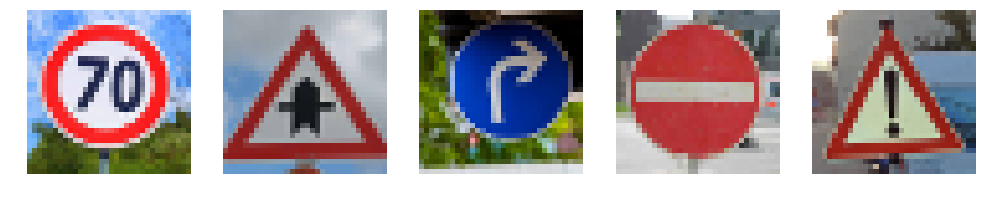

In [15]:
import cv2

fig, axes = plt.subplots(1,5, figsize=(17, 17))
ax_arr = axes.ravel()
new_signs = []
for i in range(5):
    img_file = 'new-signs/' + str(i+1) + '_mod.png'
    image = cv2.imread(img_file)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    new_signs.append(img)
    
    ax_arr[i].axis('off')
    ax_arr[i].imshow(img.reshape(32,32,3))

y_labels = [4, 11, 33, 17, 18]
new_signs = np.array(new_signs)
new_signs_normed = normalize(gray_scale(new_signs))

### Predict the Sign Type for Each Image

I think the classifier won't have hard time to classify 4 of these images except for number 3 above ("turn right ahead"). The other four images are quite clean. The sign "turn right ahead" have the top part in shadow that is something new for the classifier. 

5/5 [==============================] - ETA:  - 2s 361ms/step


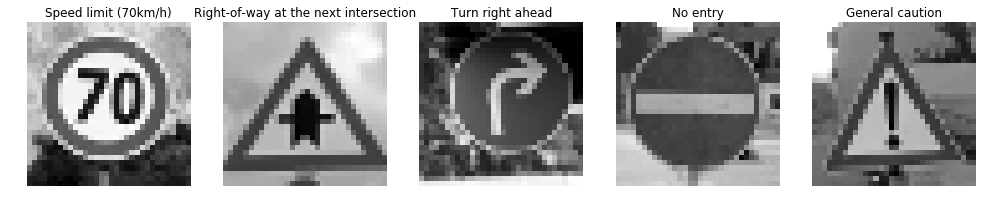

In [16]:
y_pred = model.predict_classes(new_signs_normed, batch_size=1)

fig, axes = plt.subplots(1,5, figsize=(17, 17))
ax_arr = axes.ravel()
for i in range(5):
    img = new_signs_normed[i]
    ax_arr[i].axis('off')
    ax_arr[i].imshow(img.reshape(32,32), cmap='gray')
    ax_arr[i].set_title(id2label[y_pred[i]])

### Analyze Performance

Calculate the accuracy of our prediction on this set of images:

In [18]:
### Calculate the accuracy for these 5 new images. 
acc = (y_pred ==  y_labels).sum() / len(y_labels)
print("Accuracy of prediction of new signs: " + str(acc))

Accuracy of prediction of new signs: 1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

Now for each image we output the top 5 predicted classes together with the predicted probabilities. As can be seen, the predicted class are very certain with probability is 1 most of the time.

In [19]:
y_prob = model.predict_proba(new_signs_normed)

5/5 [==============================] - 2s 362ms/step


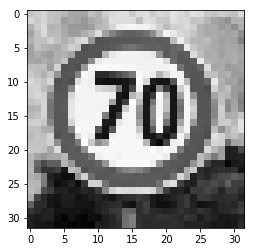

1.00e+00 : Speed limit (70km/h)
1.50e-11 : General caution
5.45e-13 : Speed limit (20km/h)
3.03e-15 : Speed limit (30km/h)
9.38e-16 : Speed limit (120km/h)


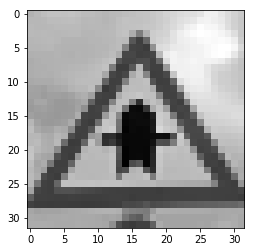

1.00e+00 : Right-of-way at the next intersection
1.88e-10 : Pedestrians
3.02e-16 : Beware of ice/snow
1.40e-19 : Traffic signals
7.16e-20 : Priority road


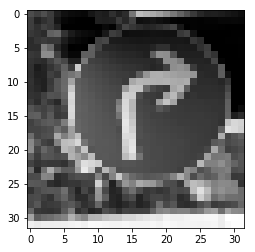

1.00e+00 : Turn right ahead
7.70e-05 : Ahead only
4.40e-05 : Stop
1.54e-06 : Speed limit (50km/h)
5.27e-07 : Speed limit (60km/h)


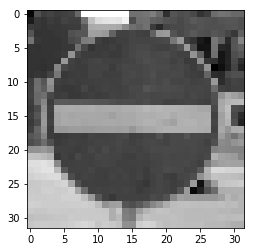

1.00e+00 : No entry
5.13e-08 : Stop
2.24e-08 : Keep right
1.47e-08 : Keep left
6.63e-09 : Yield


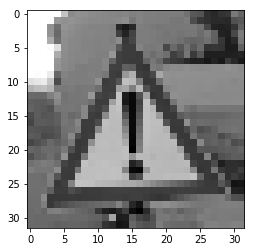

1.00e+00 : General caution
2.35e-16 : Traffic signals
2.64e-20 : Pedestrians
2.11e-23 : Wild animals crossing
3.21e-25 : Road narrows on the right


In [20]:
%matplotlib inline
for i in range(5):
    sorted_prob = np.sort(y_prob[i])[::-1]
    signs = y_prob[i].argsort()[-5:][::-1]
    img = new_signs_normed[i]
    plt.figure()
    plt.imshow(img.reshape(32,32), cmap = 'gray')
    plt.show()
    for j in range(5):
        print("%2.2e : %s" % (sorted_prob[j], id2label[signs[j]]))
        

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.